In [2]:
# import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import datetime


Cluster Analysis: To better understand what typical charging sessions look like, carry out a cluster
analysis to provide management with a succinct report of archetypical charging events. Think of an
appropriate trade-off between explainability and information content and try to come up with names
for these clusters. What is the value of identifying different types of charging sessions?

Different Clustering of the Data, Starting with kmeans

Month 

Time, KWh, Month, Temperature, doneCharging true/false, 
Maybe Charging time, onStationButNotChargingTime, siteId

Data Preparations for the Clustering

In [7]:
input_data = pd.read_csv("./charging_cleaned.csv")

# determining the total amount of seconds spent on the charging station
time_in = input_data["connectionTime"]
time_out = input_data["disconnectTime"]

time_in = pd.to_datetime(time_in)
time_out = pd.to_datetime(time_out)


print(time_in)


time_all = time_out - time_in
#time_all.to_csv("./time_total.csv")

time_sec = np.zeros(time_all.size)

for i in range(time_all.size):
   time_sec[i] = int(time_all[i].total_seconds())


KWh = input_data["kWhDelivered"]



# time on charging station while not charging
time_wasted = input_data["doneChargingTime"]
time_wasted = pd.to_datetime(time_wasted)

time_wasted = time_out - time_wasted

time_wasted_sec = np.zeros(time_wasted.size)

for i in range(time_wasted.size):
   time_wasted_sec[i] = int(time_wasted[i].total_seconds())


0       2020-01-02 13:08:54+00:00
1       2020-01-02 13:36:50+00:00
2       2020-01-02 13:56:35+00:00
3       2020-01-02 13:59:58+00:00
4       2020-01-02 14:00:01+00:00
                   ...           
66445   2019-07-31 18:08:04+00:00
66446   2019-07-31 18:40:41+00:00
66447   2019-07-31 19:04:40+00:00
66448   2019-07-31 19:19:47+00:00
66449   2019-07-31 19:21:47+00:00
Name: connectionTime, Length: 66450, dtype: datetime64[ns, UTC]


K-Means Clustering

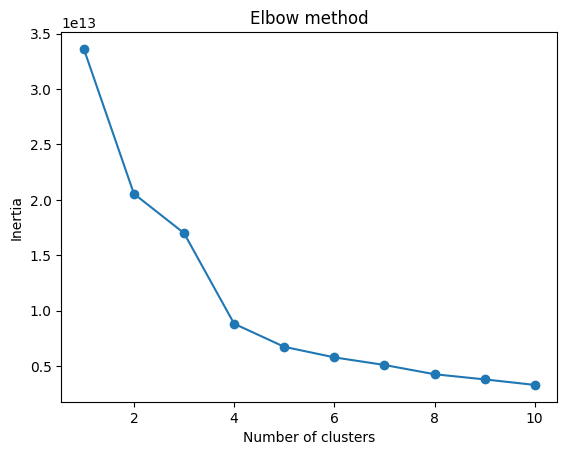

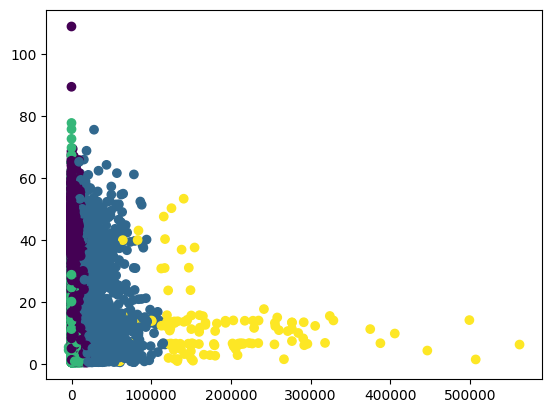

In [12]:
data = list(zip(time_sec, time_wasted_sec, KWh))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
inertias.append(kmeans.inertia_)

plt.scatter(time_wasted_sec, KWh, c=kmeans.labels_)
plt.show() 

A different type of Clustering maybe Hierachichal,

User Inputs as Cluster, Compared to Total
